In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 데이터 불러오기
# data_info = pd.read_csv('data_info.csv',encoding='cp949')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


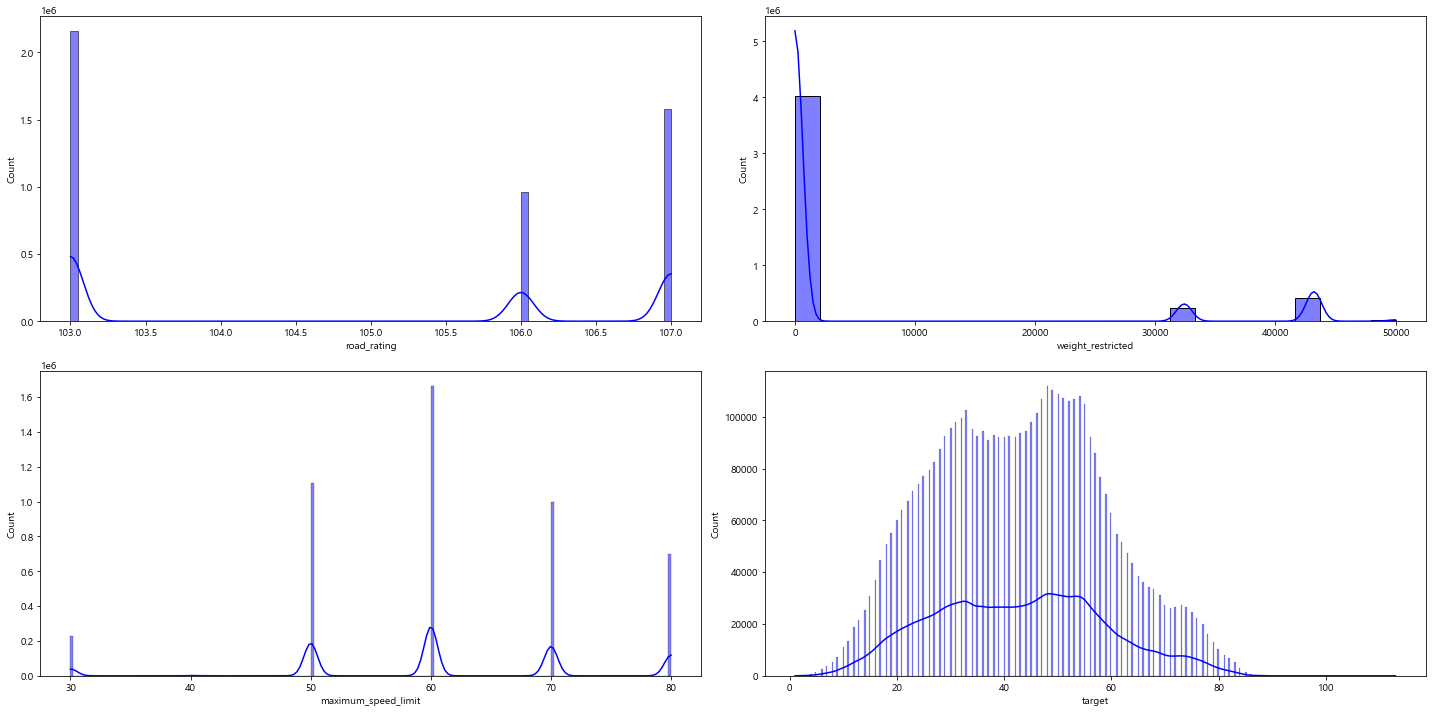

In [4]:
# road_rating, weight_restricted, maximum_speed_limit, target 분포 살펴보기

plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.histplot(x=train['road_rating'],kde=True,ax=axes[0][0], color='blue')
sns.histplot(x=train['weight_restricted'],kde=True,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=True,ax=axes[1][0], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[1][1], color='blue')

plt.tight_layout()
plt.show()

# road_rating = 3개의 값.
# weight_restricted = 대부분 0.
# maximum_speed_limit = 60이 대다수.
# 연속적인 데이터는 없음.

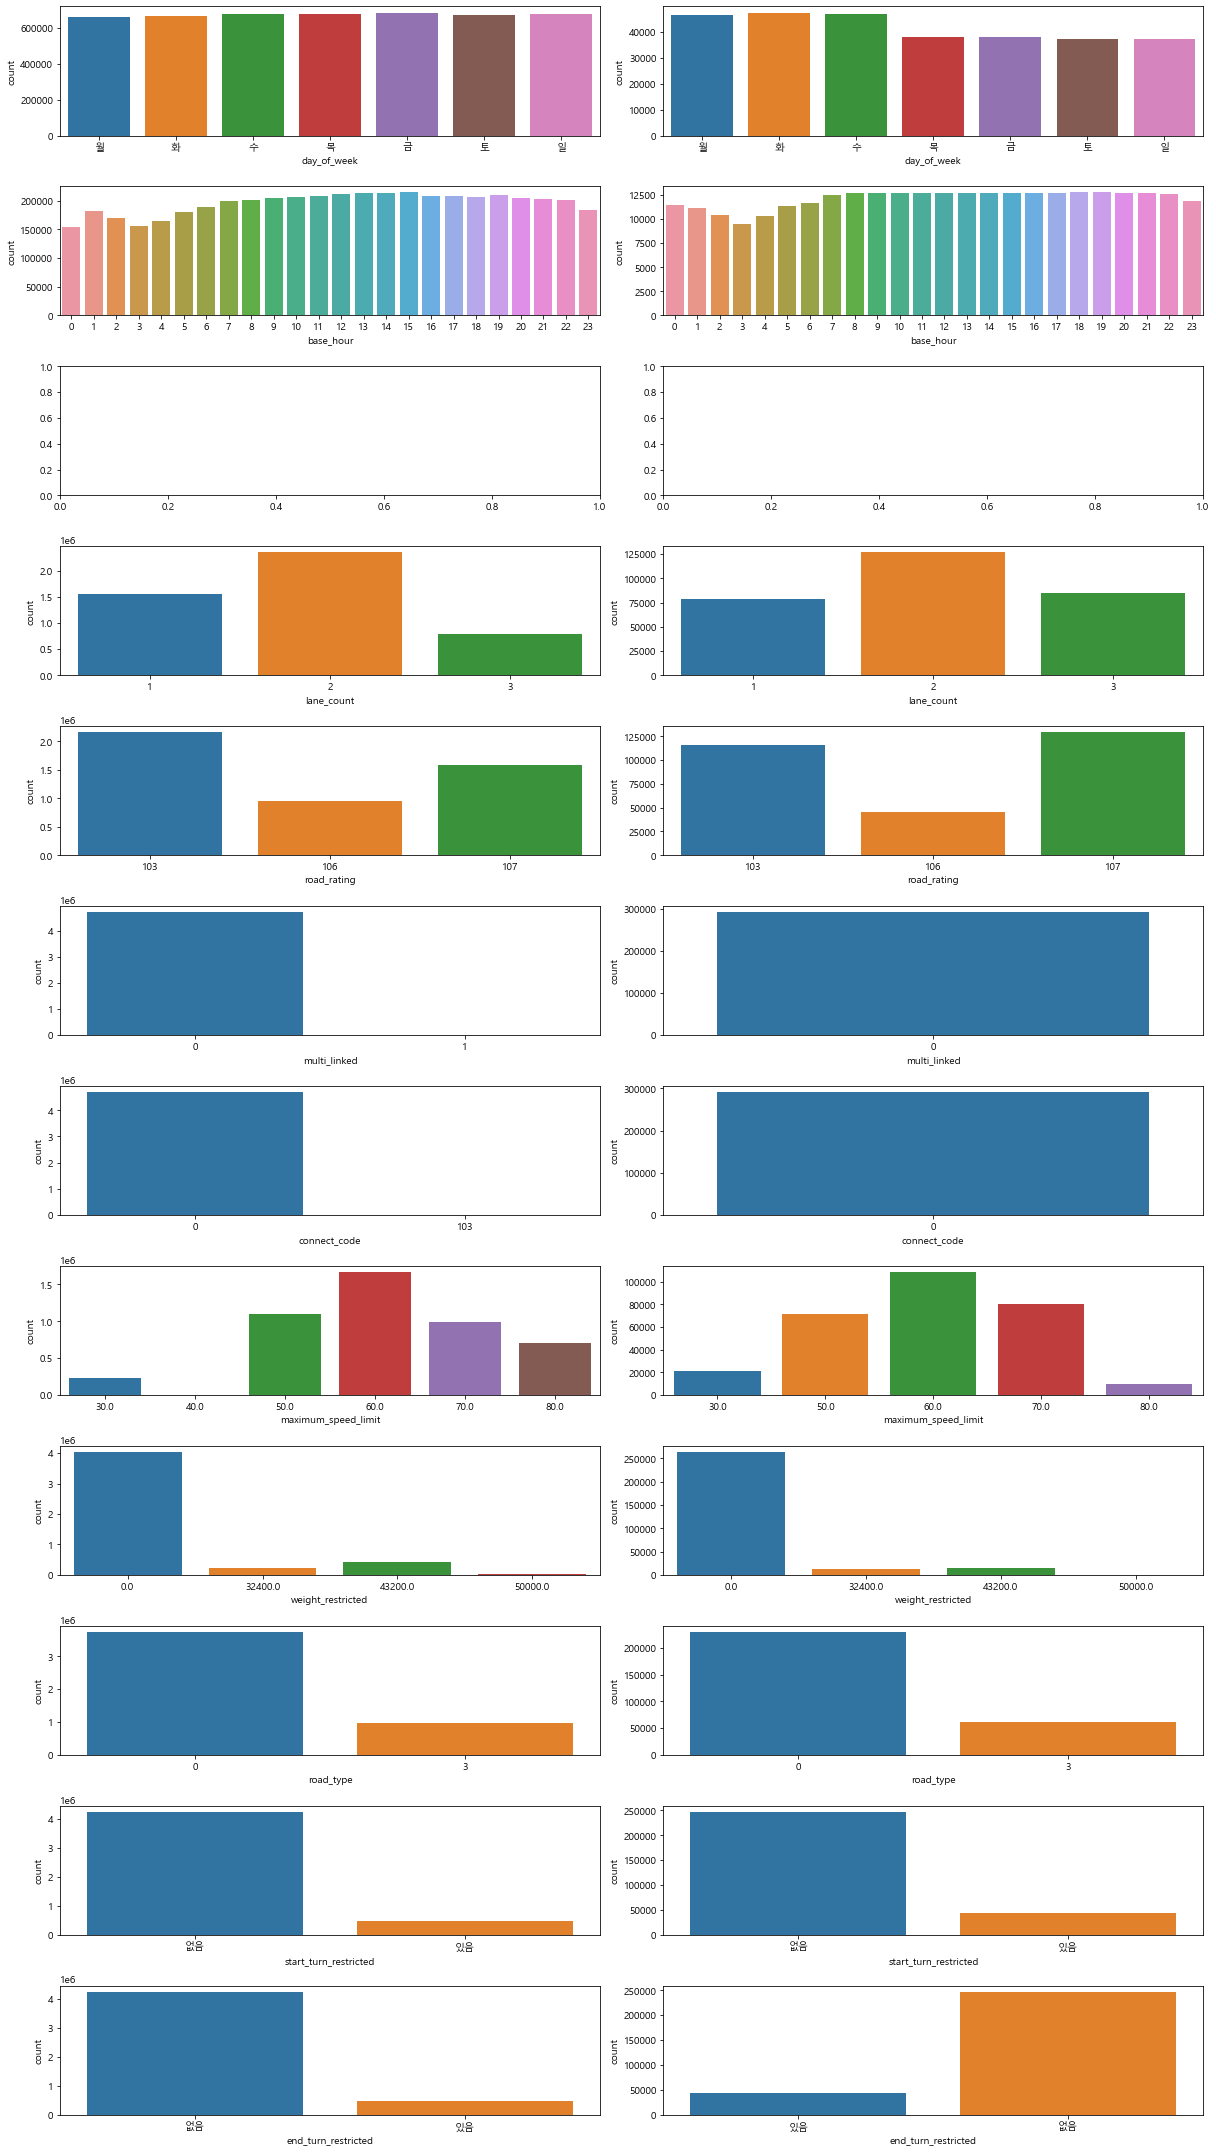

In [5]:
# 각 컬럼에 대한 분포 확인

date_order = ['월','화','수','목','금','토','일']

fig, axes = plt.subplots(12, 2, figsize=(17,30))

sns.countplot(x='day_of_week', data=train, ax=axes[0][0],order=date_order)
sns.countplot(x='day_of_week', data=test, ax=axes[0][1],order=date_order)
sns.countplot(x='base_hour', data=train, ax=axes[1][0])
sns.countplot(x='base_hour', data=test, ax=axes[1][1])
sns.countplot(x='lane_count', data=train, ax=axes[3][0])
sns.countplot(x='lane_count', data=test, ax=axes[3][1])
sns.countplot(x='road_rating', data=train, ax=axes[4][0])
sns.countplot(x='road_rating', data=test, ax=axes[4][1])
sns.countplot(x='multi_linked', data=train, ax=axes[5][0])
sns.countplot(x='multi_linked', data=test, ax=axes[5][1])
sns.countplot(x='connect_code', data=train, ax=axes[6][0])
sns.countplot(x='connect_code', data=test, ax=axes[6][1])
sns.countplot(x='maximum_speed_limit', data=train, ax=axes[7][0])
sns.countplot(x='maximum_speed_limit', data=test, ax=axes[7][1])
sns.countplot(x='weight_restricted', data=train, ax=axes[8][0])
sns.countplot(x='weight_restricted', data=test, ax=axes[8][1])
sns.countplot(x='road_type', data=train, ax=axes[9][0])
sns.countplot(x='road_type', data=test, ax=axes[9][1])
sns.countplot(x='start_turn_restricted', data=train, ax=axes[10][0])
sns.countplot(x='start_turn_restricted', data=test, ax=axes[10][1])
sns.countplot(x='end_turn_restricted', data=train, ax=axes[11][0])
sns.countplot(x='end_turn_restricted', data=test, ax=axes[11][1])

plt.tight_layout()
plt.show()

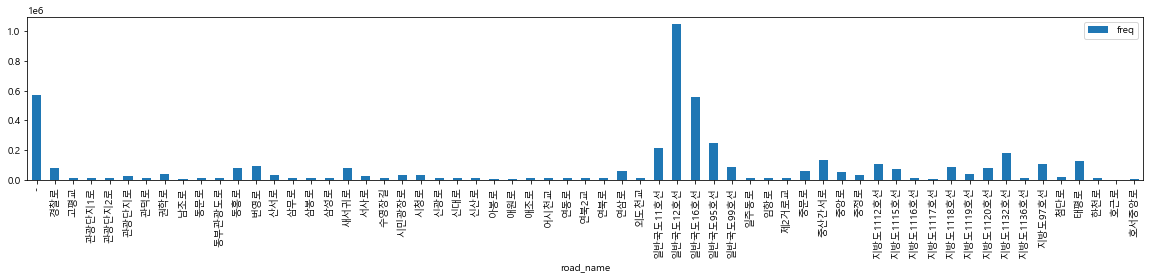

In [6]:
# 도로 분포 확인
# train

train1 = train.copy()
train1['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train1 = train1[['road_name','freq']]
train1 = train1.groupby('road_name').mean().reset_index()
train1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

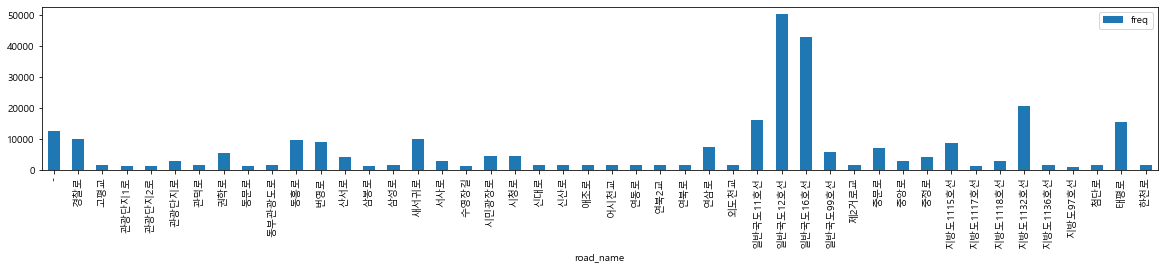

In [7]:
# 도로 분포 확인
# test

test1 = test.copy()
test1['freq'] = test1.groupby('road_name')['road_name'].transform('count')
test1 = test1[['road_name','freq']]
test1 = test1.groupby('road_name').mean().reset_index()
test1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

In [8]:
# 그룹화
train_date = train[['base_date','target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reindex(['월','화','수','목','금','토','일']).reset_index()

train_name = train[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

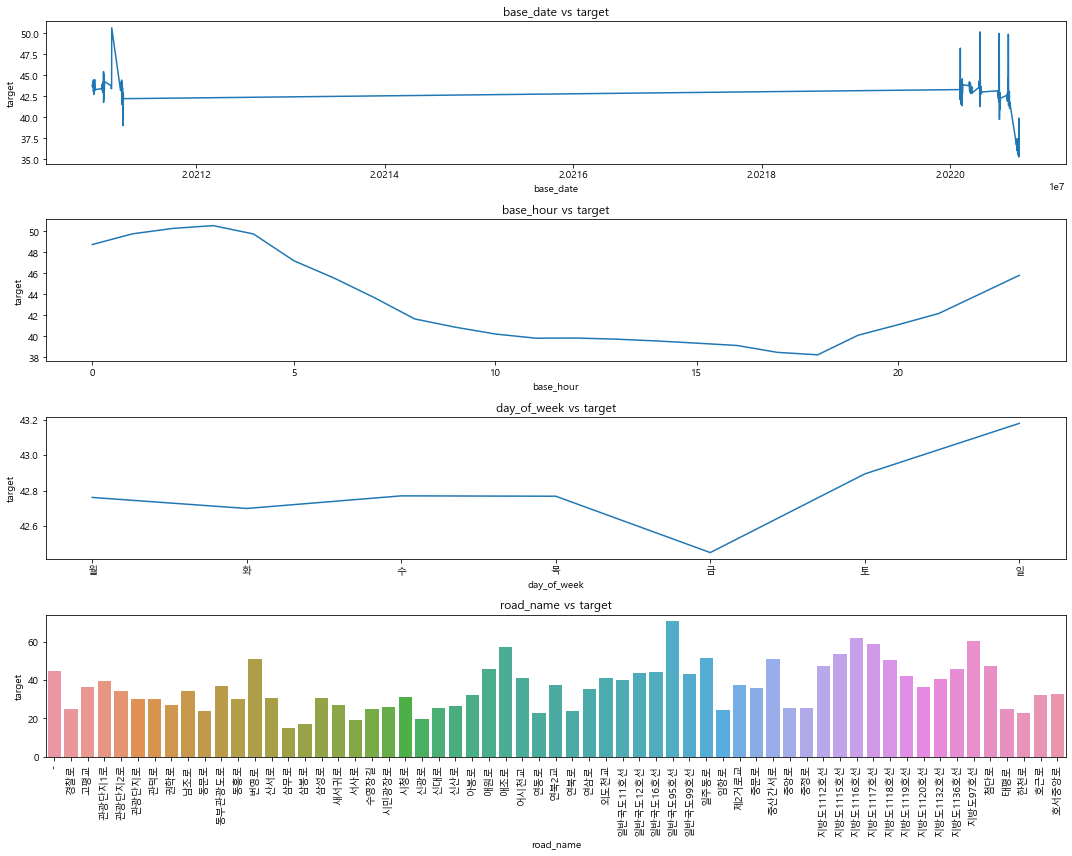

In [9]:
# 그룹화 한 내용을 포함한 시각화

fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()